# **Visualización**
# AE09. Seaborn Stripplot y Swarmplot

En este notebook veremos dos tipos de gráficas de `Seaborn` las cuales son excelentes alternativas para hacer gráficas categóricas utilizando puntos. 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
sns.__version__ #Revisamos que estemos en la ultima versión de seaborn

'0.11.2'

In [3]:
# Importamos las librerías adicionales para el manejo numérico y de DataFrame
import numpy as np
import pandas as pd

In [4]:
sns.set(context='notebook',style='darkgrid',palette='dark')

En este caso, ahora en adelante todos los gráficos que utilicemos van a tener el formato que nosotros definimos con el método `sns.set()`

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
penguins_df = pd.read_csv("/content/drive/MyDrive/Colab_Python/03. Análisis Exploratorio y Estadística/Archivos/VD02.csv").dropna()
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


##<font color='blue'>Gráficas  stripplot</font>

El método `sns.stripplot` sitúa la variable categórica en el eje `x` y la variable cuantitativa en el eje `y`, mostrando con un punto cada uno de los valores. Para poder distinguir los puntos en el caso de que estén muy próximos, por defecto, se aplica un "temblor" (jitter) a los puntos para separarlos del eje vertical de forma aleatoria:

[Documentación stripplot](https://seaborn.pydata.org/generated/seaborn.stripplot.html?highlight=stripplot#seaborn.stripplot)


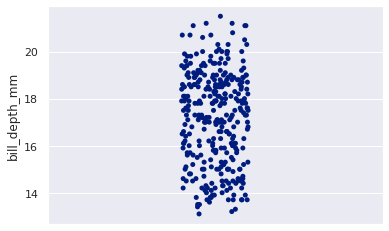

In [7]:
sns.stripplot(y ='bill_depth_mm', data=penguins_df) #se separa de manera aleatoria
plt.show()

ejemplo de un cambio en el parámetro `jitter`:

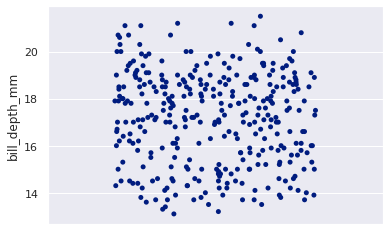

In [8]:
sns.stripplot(y ='bill_depth_mm', data=penguins_df, jitter=0.3) #jitter amplia el rango de x
plt.show()

Podemos adicionar valores categóricos para realizar la separación de los puntos según categoría.

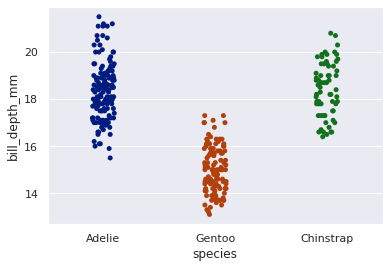

In [9]:
sns.stripplot(x='species',y ='bill_depth_mm', data=penguins_df) #x species es una variable categórica
plt.show()

##<font color='blue'>Gráficas  swarmplot</font>

El segundo método corresponde a `swarmplot` (gráfico de enjambre). Para poder realizar este gráfico hay que utilizar el método `sns.swarmplot`, el cual genera gráficos semejantes a los generados por `sns.stripplot`, pero aplicando a la posición de los puntos cierto algoritmo de forma que no solapen. Esto ofrece una mejor visualización a costa de dejar de ser útil para conjuntos de datos muy grandes:

[Documentación Swarmplot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html?highlight=swarmplot#seaborn.swarmplot)


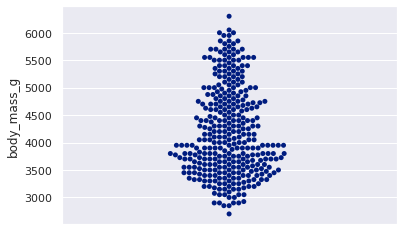

In [10]:
sns.swarmplot(y ='body_mass_g', data=penguins_df) #este gráfico agrupa la frecuencia de los datos por y 
plt.show()

Podemos adicionar valores categóricos para realizar la separación de los puntos según categoría. (de la misma forma que el stripplot)

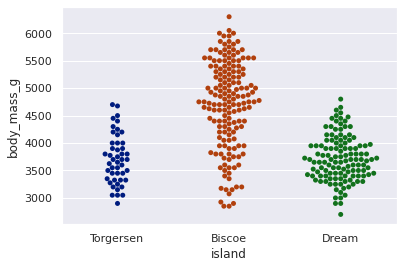

In [11]:
sns.swarmplot(x='island',y ='body_mass_g', data=penguins_df)
plt.show()

Y recordar que también podemos pintar los puntos, dependiendo de alguna columna de nuestro interés

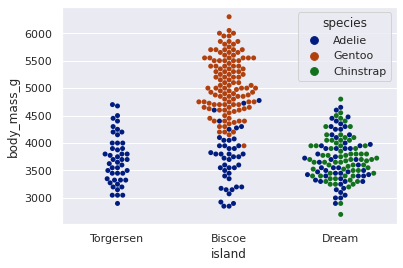

In [12]:
sns.swarmplot(x='island',y ='body_mass_g', data=penguins_df,hue="species") #se usa hue
plt.show()

Se puede dibujar un diagrama de enjambre por sí solo, pero también es un buen complemento para un diagrama de caja o violín en los casos en los que desee mostrar todas las observaciones junto con alguna representación de la distribución subyacente. 

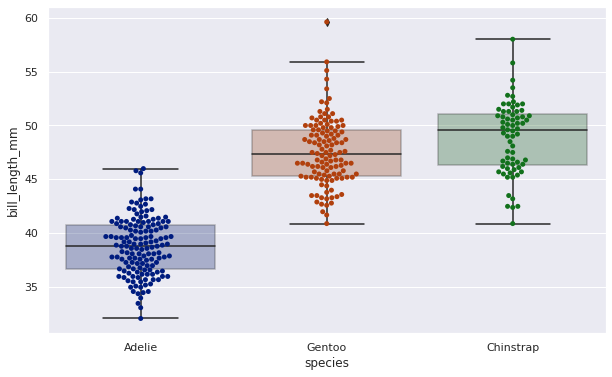

In [13]:
# Para una mejor visualización le damos transparencia al boxplot, sin embargo, este método
# no tiene definido el parámetro 'alpha' en la API, pero si se puede lograr este efecto a 
# través de kwargs que se transmiten a matplotlib 
# Acá boxprop es un argumento de matplotlib
plt.figure(figsize=(10,6))
sns.boxplot(x='species',y='bill_length_mm', data=penguins_df, boxprops=dict(alpha=0.3)) #boxprops es un parámetro de matplotlib
sns.swarmplot(x='species',y='bill_length_mm', data=penguins_df)
plt.show()

## <font color='green'>Actividad 1:</font>

Para esta dinámica utilizaremos un set de datos de precios de diamantes (VD09.csv). La mayoría de las variables son auto explicativas a excepción de las variables `x`, `y`, `z`. Básicamente, estas variables hacen referencia al largo alto y ancho del diamante respectivamente. La idea es implementar la mayoría de los gráficos que hemos visto, con un par de diferencias:

1. Graficar la matriz de correlación para las distintas variables numéricas
2. Utilizando subplots genere 7 histogramas para las siguientes variables: carat, depth, table, price, x , y , z
3. Utilizando subplots genere 4 boxplots respetando las siguientes instrucciones:
    - Obtenga una muestra aleatoria del set de datos de los diamantes utilizando el método `diamonds_df.sample(100)`
    - Guarde esta muestra en una variable, utilícela para generar los gráficos
    - Genere los boxplots con una paleta de color pastel (puede que el parámetro `palette` puede ser de ayuda)
    - Para los dos primeros boxplots genere adicionalmente swarmplots para las mismas variables utilizadas que los boxplots (y el set de datos muestreado) **¿Surge algún warning de ejecución de codigo? ¿Que cree que pasaría si utilizara una muestra de 1000?**
    - Para los dos últimos boxplots, genere adicionalmente stripplots para las mismas variables utilizadas que los boxplots (y el set de datos muestreado) **¿Surge algún warning de ejecución de codigo?**
4. Utilizando subplots, genere 4 barplots
    - Cuente cuantos diamantes hay para cada corte (`cut`)
    - Cuente cuantos diamantes hay para cada color
    - Genere el gráfico de barras de precio promedio en relación con la claridad del diamante
    - Genere el gráfico de barras de precio acumulado total en relación a la claridad del diamante **¿Que función de numpy suma todos los elementos de un arreglo?**


In [14]:
diamonds_df = pd.read_csv("/content/drive/MyDrive/Colab_Python/03. Análisis Exploratorio y Estadística/Archivos/VD09.csv")
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [15]:
diamonds_df.describe()
diamonds_df.columns

col = ['carat', 'depth', 'table','price', 'x', 'y', 'z']
corr = diamonds_df[col].corr()

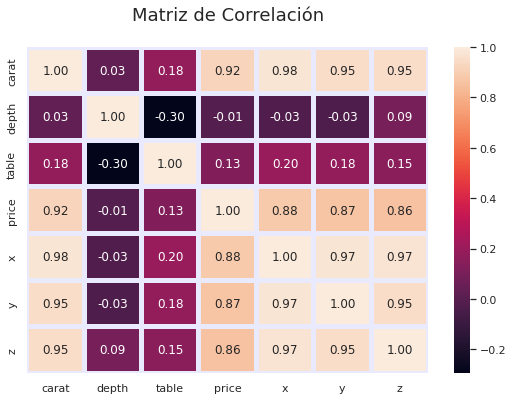

In [16]:
#1 Graficar matriz de correlación
plt.figure(figsize=(9,6))
sns.heatmap(corr, annot=True, linewidths=4, linecolor='#eaeaff', fmt='.2f')
plt.title('Matriz de Correlación' + '\n', fontsize=18)
plt.show()


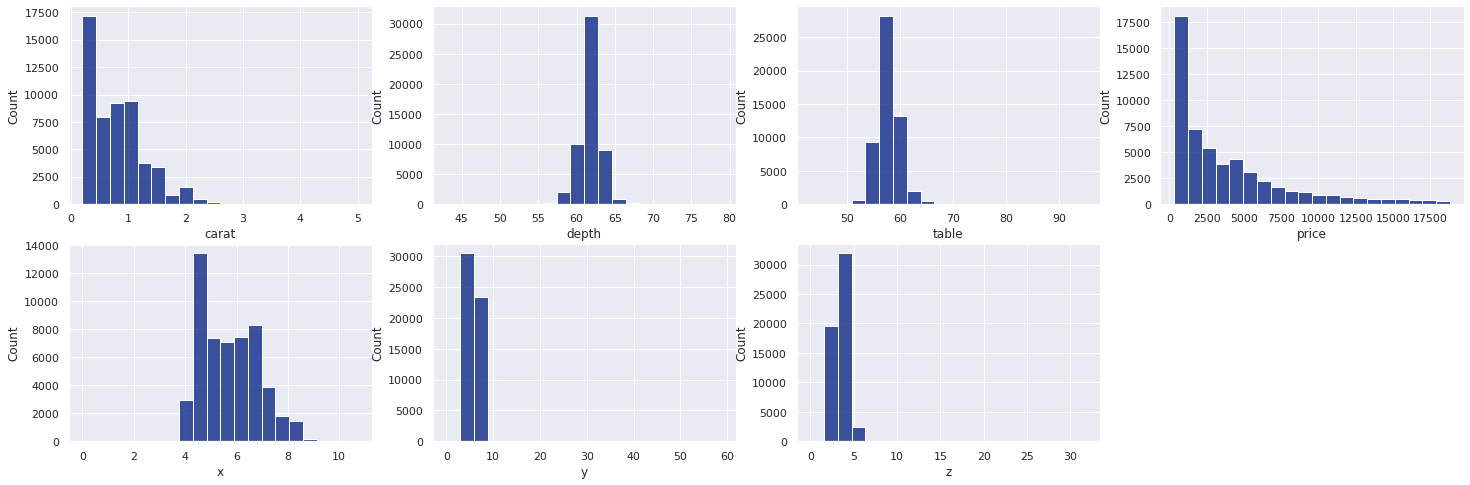

In [17]:
#2 Histogramas
fig, ax = plt.subplots(2,4, figsize=(25,8))
sns.histplot(x='carat', data=diamonds_df, ax=ax[0,0], bins=20) 
sns.histplot(x='depth', data=diamonds_df, ax=ax[0,1], bins=20)
sns.histplot(x='table', data=diamonds_df, ax=ax[0,2], bins=20)
sns.histplot(x='price', data=diamonds_df, ax=ax[0,3], bins=20)
sns.histplot(x='x', data=diamonds_df, ax=ax[1,0], bins=20) 
sns.histplot(x='y', data=diamonds_df, ax=ax[1,1], bins=20)
sns.histplot(x='z', data=diamonds_df, ax=ax[1,2], bins=20)
sns.histplot(x='z', data=diamonds_df, ax=ax[1,3], bins=20).remove()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


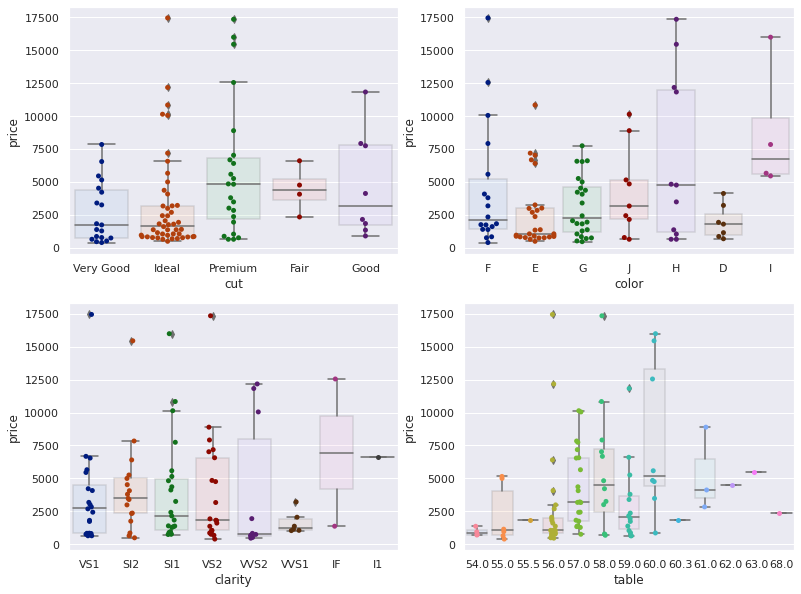

In [32]:
#3 boxplots de una muestra aleatoria de 100 registros (con semilla)
diamonds_sample_df = diamonds_df.sample(n=100, random_state=12)

fig, ax = plt.subplots(2,2, figsize=(13,10))
sns.boxplot(x='cut', y='price', data=diamonds_sample_df, ax=ax[0,0], palette='pastel', boxprops=dict(alpha=0.2))
sns.swarmplot(x='cut', y='price', data=diamonds_sample_df, ax=ax[0,0]) 
sns.boxplot(x='color', y='price', data=diamonds_sample_df, ax=ax[0,1], palette='pastel', boxprops=dict(alpha=0.2))
sns.swarmplot(x='color', y='price', data=diamonds_sample_df, ax=ax[0,1]) 
sns.boxplot(x='clarity', y='price', data=diamonds_sample_df, ax=ax[1,0], palette='pastel', boxprops=dict(alpha=0.2))
sns.stripplot(x='clarity', y='price', data=diamonds_sample_df, ax=ax[1,0]) 
sns.boxplot(x='table', y='price', data=diamonds_sample_df, ax=ax[1,1], palette='pastel', boxprops=dict(alpha=0.2))
sns.stripplot(x='table', y='price', data=diamonds_sample_df, ax=ax[1,1]) 
plt.show()

<font color="green">Hay un warning que dice que falta espacio en los puntos para swarmplot, sugiere cambiar a un gráfico de stripplot o disminuir el tamaño de los puntos. A mayor tamaño de muestra, una mayor cantidad de warnings van a aparecer.</font>

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 13.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.9% of the points cannot be placed; you 

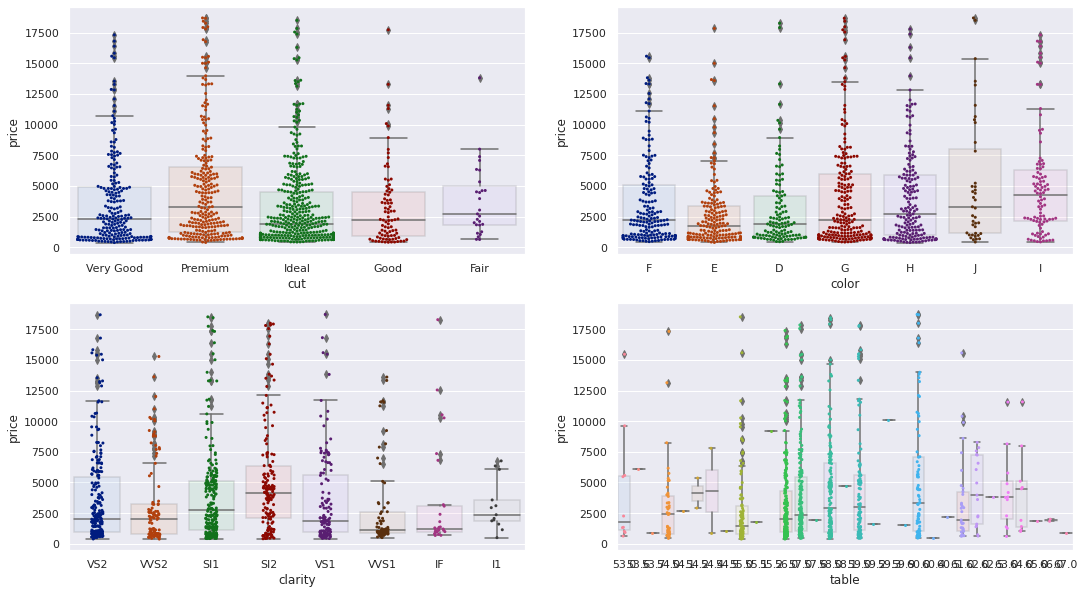

In [31]:
#3 boxplots de una muestra aleatoria de 1000 registros (con semilla)
diamonds_sample_df = diamonds_df.sample(n=1000, random_state=27)

fig, ax = plt.subplots(2,2, figsize=(18,10))
sns.boxplot(x='cut', y='price', data=diamonds_sample_df, ax=ax[0,0], palette='pastel', boxprops=dict(alpha=0.2))
sns.swarmplot(x='cut', y='price', data=diamonds_sample_df, ax=ax[0,0], size=3) 
sns.boxplot(x='color', y='price', data=diamonds_sample_df, ax=ax[0,1], palette='pastel', boxprops=dict(alpha=0.2))
sns.swarmplot(x='color', y='price', data=diamonds_sample_df, ax=ax[0,1], size=3) 
sns.boxplot(x='clarity', y='price', data=diamonds_sample_df, ax=ax[1,0], palette='pastel', boxprops=dict(alpha=0.2))
sns.stripplot(x='clarity', y='price', data=diamonds_sample_df, ax=ax[1,0], size=3) 
sns.boxplot(x='table', y='price', data=diamonds_sample_df, ax=ax[1,1], palette='pastel', boxprops=dict(alpha=0.2))
sns.stripplot(x='table', y='price', data=diamonds_sample_df, ax=ax[1,1], size=3) 
plt.show()

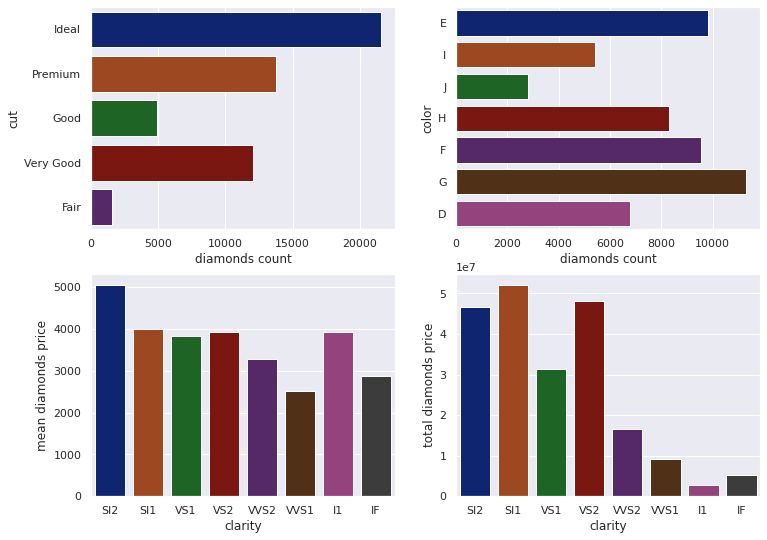

In [66]:
#4 barplots
fig, ax = plt.subplots(2,2, figsize=(12,9))
ax1 = sns.countplot(y='cut', data=diamonds_df, ax=ax[0,0])
ax1.set(xlabel='diamonds count')
ax2 = sns.countplot(y='color', data=diamonds_df, ax=ax[0,1])
ax2.set(xlabel='diamonds count')
ax3 = sns.barplot(x='clarity', y='price', data=diamonds_df, ax=ax[1,0], ci=None, estimator=np.mean)
ax3.set(ylabel='mean diamonds price')
ax4 = sns.barplot(x='clarity', y='price', data=diamonds_df, ax=ax[1,1], ci=None, estimator=np.sum)
ax4.set(ylabel='total diamonds price')
plt.show()

<font color='green'>Fin actividad 1</font>